# Clasificacion con K-NN

El algoritmo de k-vecinos-cercanos (K-NN) es un algoritmo de aprendizaje supervisado que se utiliza para clasificación. En este ejemplo, utilizaremos el K-NN para clasificar digitos escritos a mano.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from numpy import random

cv2.__version__

'3.2.0'

### Ejemplos

Utilizaremos para ello pequeñas imagenes de 20x20 pixeles donde se encuentra un solo digito.

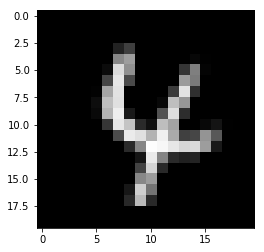

In [2]:
img_cuatro = cv2.imread('cuatro.png')
plt.imshow(img_cuatro)

### Base de datos

Dado que tener todos los ejemplos por separado ocuparia mas espacio. Todos los ejemplos se encuentran en 'pegados' en una sola imagen de 1000 por 2000 pixeles Es decir, tenemos 50 por 100 digitos en esa imagen

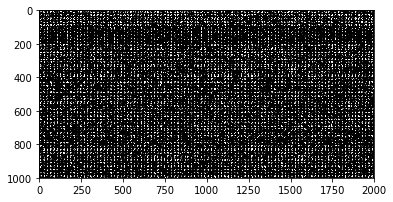

In [3]:
img = cv2.imread('digits.png')
plt.imshow(img)

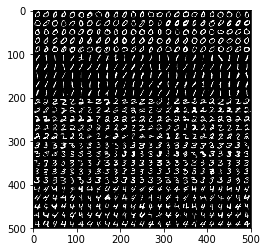

In [4]:
# Zoom
plt.imshow(img[0:500,0:500])

### Preprocesamiento

En el preprocesamiento vamos a extraer los parches de 20x20 pixeles que se encuentran en la base de datos.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3  34  23
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  46 158 255 199
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 154 230 254 255 206
    0   0]
 [  0   0   0   0   0   0   0   0   0   0  27 124 234 227 137  27 124 156
    0   0]
 [  0   0   0   0   0   0   0   0   0  54 192 255 164  40   0   1 145  99
    0   0]
 [  0   0   0   0   0   0   0   0  84 236 255 133   4   0   0  36 146  20
    0   0]
 [  0   0   0   0   0   0   0 131 229 239 196   0   0   0   0 106  92   0
    0   0]
 [  0   0   0   0   0   0 125 254 136  60  73   0   0   0  32 162  28   0
    0   0]
 [  0   0   0   0   0 132 254 119   2   0   0   0   0   0 141 126   0   0
    0   0]
 [  0   0   0   0  97 246 113   2   0   0   0   0   0 104 219  44

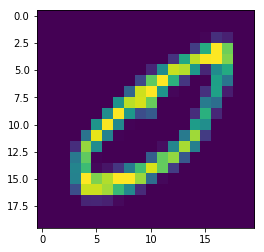

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Dividimos la imagen en 5 mil (50x100) parches de 20x20 cada uno
parches = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Conversion a np.array de tamaño (50,100,20,20)
x = np.array(parches)

#Visualicemos uno de esos parches
print(x[1,1,:,:])
plt.imshow(x[1,1,:,:])

### Dividir la base de datos

Como vimos tenemos disponibles 5 mil ejemplos. Vamos a dividir estos ejemplos en dos conjuntos:
- *Entrenamiento*. Conjunto que utilizara el algoritmo para buscar los vecinos mas cercanos. Recordemos que este conjunto debe estar previamente etiquetado.
- *Prueba*. Conjunto donde probaremos que tan bueno seran las predicciones. Puedo o no estar etiquetado. En este caso sabemos las etiquetas.

![Drag Racing](supervised.png)


In [6]:
# Dividiremos en partes iguales
entrenamiento = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
prueba = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

print(len(entrenamiento))
print(len(prueba))

2500
2500


In [7]:
# Create labels for train and test data
etiquetas = np.arange(10)
print('Etiquetas:', etiquetas)


Etiquetas: [0 1 2 3 4 5 6 7 8 9]


In [8]:
train_labels = np.repeat(etiquetas,250)[:,np.newaxis]
test_labels = train_labels.copy()

print(len(train_labels))
print(train_labels)

2500
[[0]
 [0]
 [0]
 ..., 
 [9]
 [9]
 [9]]


### Entrenamiento

Formalmente debe haber un entrenamiento. En este caso, K-NN empareja cada uno de los ejemplos dados con sus respectivas etiquetas. 

In [12]:
# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create()
knn.train(entrenamiento, cv2.ml.ROW_SAMPLE, train_labels)

True

### Prediccion

Ahora probaremos el algoritmos para los ejemplos que dejamos aparte.

In [19]:
k_vecinos = 5

ret,result,neighbours,dist = knn.findNearest(prueba,k_vecinos)

print('Numero de predicciones:', len(result))
print(result)



Numero de predicciones: 2500
[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 9.]
 [ 9.]
 [ 9.]]


Etiqueta predicha: [ 6.]
Vecinos cercanos: [ 6.  6.  6.]


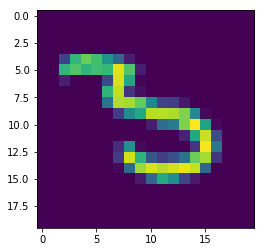

In [17]:
# Some rangom examples
indice = random.randint(2500)
img_test = prueba[indice].reshape(20,20)
print('Etiqueta predicha:', result[indice])
print('Vecinos cercanos:', neighbours[indice])
    
plt.imshow(img_test)

### Evaluacion de los resultados

Para saber que también esta funcionando el algoritmo compararemos las predicciones con las etiquetas reales, las cuales sabemos de antemano por su posición en la base de datos.

In [20]:
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
print("Número de predicciones correctas:", correct)
accuracy = correct*100.0/result.size
print ('Precision:', accuracy)

Número de predicciones correctas: 2294
Precision: 91.76
